# PRCL - 0012 - IT Service Management

## Business Case:

ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets per year , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.


_`Incident management (IM)` is an ITSM process area. 
The first goal of the IM process is to restore a normal service operation as quickly as possible and to
minimize the impact on business operations, thus ensuring that the best possible levels of service quality and
availability are maintained._

_`ITIL` (Information Technology Infrastructure Library) is a framework designed to standardize the selection, planning, delivery, maintenance and overall lifecycle of IT services within a business. The goal is to improve efficiency and achieve predictable service delivery._

ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

## Project Tasks:
**Machine Learning as way to improve ITSM processes:**

ABC Tech management recently attended Machine Learning conference on ML for ITSM.
Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 4 key areas, where ML can help ITSM process in ABC Tech.

1. **Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.**

2. **Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.**

3. **Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.**

4. **Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.**

IT Service Management (ITSM) is a variety of activities directed towards maintenance of IT infrastructure. Hence, it is considered to be an important activity for any company.

Time of incidents’ resolution is the key performance indicator for ITSM.

Application of machine learning models in ITSM allows significant improves in customer experience and
handling issues more efficiently, decreasing service desk agents’ efforts and reducing service costs.

### Data Set Fields:
Total of about 46k records from year 2012,2013,2014

## Importing Libraries

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

# for warnings
import warnings
warnings.filterwarnings('ignore')

## Making connections to MySQL Database Server

### Connecting the database

### Fetching the table and storing it in Variable

### Exporting DataFrame to CSV

## Reading the Data 

In [2]:
df=pd.read_csv("ITSM_data.csv")

## Basic Checks

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [4]:
df.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,0.902320,incident,KM0000182,closed,0.0,31-03-2014 17:24,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

### Feature Information: 
1. **CI_Name, CI_Cat, CI_Subcat:** A Configuration Item (CI) is any service component, infrastructure element, or other item that needs to be managed in order to ensure the successful delivery of services.
2. **WBS:** Work Breakdown Structure 
3. **KB_Number:** Knowledge Based Number

In [6]:
df.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


## Data Manipulation and Cleaning

### 1. Checking for Unique labels in each feature.

In [7]:
print("UNIQUE VALUES IN EACH FEATURE: ")
print("==============================")
for col in df.columns:
    print(col ,":", df[col].unique(), "with", len(df[col].unique()), "labels")
    print("Datatypes:", [x for x in df[col].apply(type).unique()])      
    print("**********************************************************************************************************")

UNIQUE VALUES IN EACH FEATURE: 
CI_Name : ['SUB000508' 'WBA000124' 'DTA000024' ... 'CBD000595' 'CBD000443'
 'SWT000008'] with 3019 labels
Datatypes: [<class 'str'>]
**********************************************************************************************************
CI_Cat : ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone'] with 13 labels
Datatypes: [<class 'str'>, <class 'float'>]
**********************************************************************************************************
CI_Subcat : ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 

Related_Interaction : ['SD0000007' 'SD0000011' 'SD0000017' ... 'SD0146982' 'SD0146986'
 'SD0147088'] with 43060 labels
Datatypes: [<class 'str'>]
**********************************************************************************************************
No_of_Related_Incidents : [ 2.  1. nan 23.  4.  3.  7. 11. 12. 54. 24. 16.  8.  6. 25. 14. 10.  9.
  5. 17. 26. 21. 63. 13. 15.] with 25 labels
Datatypes: [<class 'float'>]
**********************************************************************************************************
No_of_Related_Changes : [nan  1.  2.  3.  9.] with 5 labels
Datatypes: [<class 'float'>]
**********************************************************************************************************
Related_Change : [nan 'C00000056' '#MULTIVALUE' 'C00000308' 'C00000582' 'C00006478'
 'C00000778' 'C00002486' 'C00000577' 'C00001219' 'C00004614' 'C00000510'
 'C00002078' 'C00001452' 'C00000589' 'C00004490' 'C00002426' 'C00000517'
 'C00000449' 'C00001728' 'C00001549' 'C00

###  2. Checking the missing values

In [8]:
# Create a new dataframe with only missing values

missing_data = pd.DataFrame({'Missing Values' :df.isnull().sum()})

# Missing Values in each variables in Percentage

missing_data["% Missing Values"]=(df.isnull().sum()/len(df))*100
missing_data

,Missing Values,% Missing Values
CI_Name,0,0.000000
CI_Cat,111,0.238167
CI_Subcat,111,0.238167
WBS,0,0.000000
Incident_ID,0,0.000000
Status,0,0.000000
Impact,0,0.000000
Urgency,0,0.000000
Priority,1380,2.960992
number_cnt,0,0.000000


#### OBSERVATION:
**Features such as Reopen_Time, No_of_Related_Incidents, No_of_Related_Changes and Related_Change have more than 90% missing values, so we can drop them.**

### 3. Converting Time Features into Date_Time Datatype

In [9]:
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [11]:
df["Open_Time"]=pd.to_datetime(df["Open_Time"])
df["Close_Time"]=pd.to_datetime(df["Close_Time"])
df["Resolved_Time"]=pd.to_datetime(df["Resolved_Time"])
df["Reopen_Time"]=pd.to_datetime(df["Reopen_Time"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46495 non-null  object        
 2   CI_Subcat                   46495 non-null  object        
 3   WBS                         46606 non-null  object        
 4   Incident_ID                 46606 non-null  object        
 5   Status                      46606 non-null  object        
 6   Impact                      46606 non-null  object        
 7   Urgency                     46606 non-null  object        
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  object        
 11  KB_number                   46606 non-null  object    

### 4. Data wrangling.

df.info() doesn’t always show the correct data type for a column with mixed data types; it might tell it’s a column with “objects”, but it can be really a column with mixed data types. In turn, we can use pd.api.types.infer_dtypes() for that.

In [13]:
print("UNIQUE VALUES IN EACH FEATURE: ")
print("==============================")
for col in df[['Impact', 'Urgency', 'Priority', 'No_of_Reassignments','No_of_Related_Interactions', 'No_of_Related_Incidents', 'No_of_Related_Changes']].columns:
    print(col ,":", df[col].unique(), "with", len(df[col].unique()), "labels")
    print("The Datatype is:", [x for x in df[col].apply(type).unique()])
    print("--------------------------------------------------------------------------------")

UNIQUE VALUES IN EACH FEATURE: 
Impact : ['4' '3' 'NS' '5' '2' '1'] with 6 labels
The Datatype is: [<class 'str'>]
--------------------------------------------------------------------------------
Urgency : [4 3 5 2 1 '5' '3' '4' '2' '1' '5 - Very Low'] with 11 labels
The Datatype is: [<class 'int'>, <class 'str'>]
--------------------------------------------------------------------------------
Priority : [ 4.  3. nan  5.  2.  1.] with 6 labels
The Datatype is: [<class 'float'>]
--------------------------------------------------------------------------------
No_of_Reassignments : [26. 33.  3. 13.  2.  4.  5.  6.  8. 17.  1.  7. 12.  0. 11.  9. 25. 30.
 15. 37. 32. 22. 10. 21. 19. 14. 46. 18. 16. 42. 23. 39. 20. 45. 38. 24.
 34. 29. 27. 31. nan 36.] with 42 labels
The Datatype is: [<class 'float'>]
--------------------------------------------------------------------------------
No_of_Related_Interactions : [  1.   2.   3.  14.   7.   4.   5. 370.   9.  11.  54.  nan 288.  34.
  44.  39. 

Values in `Impact`, `Urgency`, and `Priority` can be considered to be label encoded. Let's convert them into numeric type. `Urgency` Feature also contains mix datatypes. Cleaning these values is imperative to proceed further.
Rest of thhe above selected columns are nominal and can also be converted to numeric datatype.

In [14]:
df['Impact'] = pd.to_numeric(df['Impact'], errors='coerce')
df['Impact'] = df['Impact'].fillna(df['Impact'].median())

In [15]:
df.Urgency.replace(['5'],5,inplace=True)
df.Urgency.replace(['4'],4,inplace=True)
df.Urgency.replace(['3'],3,inplace=True)
df.Urgency.replace(['2'],2,inplace=True)
df.Urgency.replace(['1'],1,inplace=True)
df.Urgency.replace(['5 - Very Low'],5,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46495 non-null  object        
 2   CI_Subcat                   46495 non-null  object        
 3   WBS                         46606 non-null  object        
 4   Incident_ID                 46606 non-null  object        
 5   Status                      46606 non-null  object        
 6   Impact                      46606 non-null  float64       
 7   Urgency                     46606 non-null  int64         
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  object        
 11  KB_number                   46606 non-null  object    

### 5. Replacing Handle Time Hr Values with Difference between Close Time and Open Time. 

In [17]:
df['Handle_Time_hrs']=df["Close_Time"]-df["Open_Time"]
df['Handle_Time_hrs']=(df['Handle_Time_hrs'].dt.total_seconds()/(3600.0)).abs()

In [18]:
df['Handle_Time_hrs']

0         8256.316667
1         1700.866667
2        15722.616667
3        11637.700000
4         7370.900000
             ...     
46601        0.100000
46602        0.433333
46603        0.066667
46604        0.116667
46605        5.383333
Name: Handle_Time_hrs, Length: 46606, dtype: float64

### 6.Handling the Missing Values

In [19]:
# Create a new dataframe with only missing values
missing_data_model = pd.DataFrame({'Missing Values' :df.isnull().sum()})

# Adding the Missing Values Percentage
missing_data_model["% Missing Values"]=(df.isnull().sum()/len(df))*100
missing_data_model

,Missing Values,% Missing Values
CI_Name,0,0.000000
CI_Cat,111,0.238167
CI_Subcat,111,0.238167
WBS,0,0.000000
Incident_ID,0,0.000000
Status,0,0.000000
Impact,0,0.000000
Urgency,0,0.000000
Priority,1380,2.960992
number_cnt,0,0.000000


In [20]:
# Columns that are having more than 90% missing value can be dropped.
cols = ['Reopen_Time','No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change', 'Resolved_Time']
df = df.drop(cols, axis = 1)

In [21]:
df.isnull().sum()

CI_Name                          0
CI_Cat                         111
CI_Subcat                      111
WBS                              0
Incident_ID                      0
Status                           0
Impact                           0
Urgency                          0
Priority                      1380
number_cnt                       0
Category                         0
KB_number                        0
Alert_Status                     0
No_of_Reassignments              1
Open_Time                        0
Close_Time                       0
Handle_Time_hrs                  0
Closure_Code                   460
No_of_Related_Interactions     114
Related_Interaction              0
dtype: int64

**For Categorical Variables, using mode to replace missing values.**

In [22]:
for col in df[['CI_Cat','CI_Subcat', 'Closure_Code']].columns:
    df[col]= df[col].fillna(value= df[col].mode()[0])

In [23]:
df.isnull().sum()

CI_Name                          0
CI_Cat                           0
CI_Subcat                        0
WBS                              0
Incident_ID                      0
Status                           0
Impact                           0
Urgency                          0
Priority                      1380
number_cnt                       0
Category                         0
KB_number                        0
Alert_Status                     0
No_of_Reassignments              1
Open_Time                        0
Close_Time                       0
Handle_Time_hrs                  0
Closure_Code                     0
No_of_Related_Interactions     114
Related_Interaction              0
dtype: int64

**For Numerical Variables, using median to replace missing values.**

In [24]:
for col in df[['Priority', 'No_of_Reassignments','No_of_Related_Interactions']].columns:
    df[col]= df[col].fillna(value= df[col].median())

In [25]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
dtype: int64

## Exploratory Data Analysis

### 1. Count of Configuration Item (CI) Subcategory 

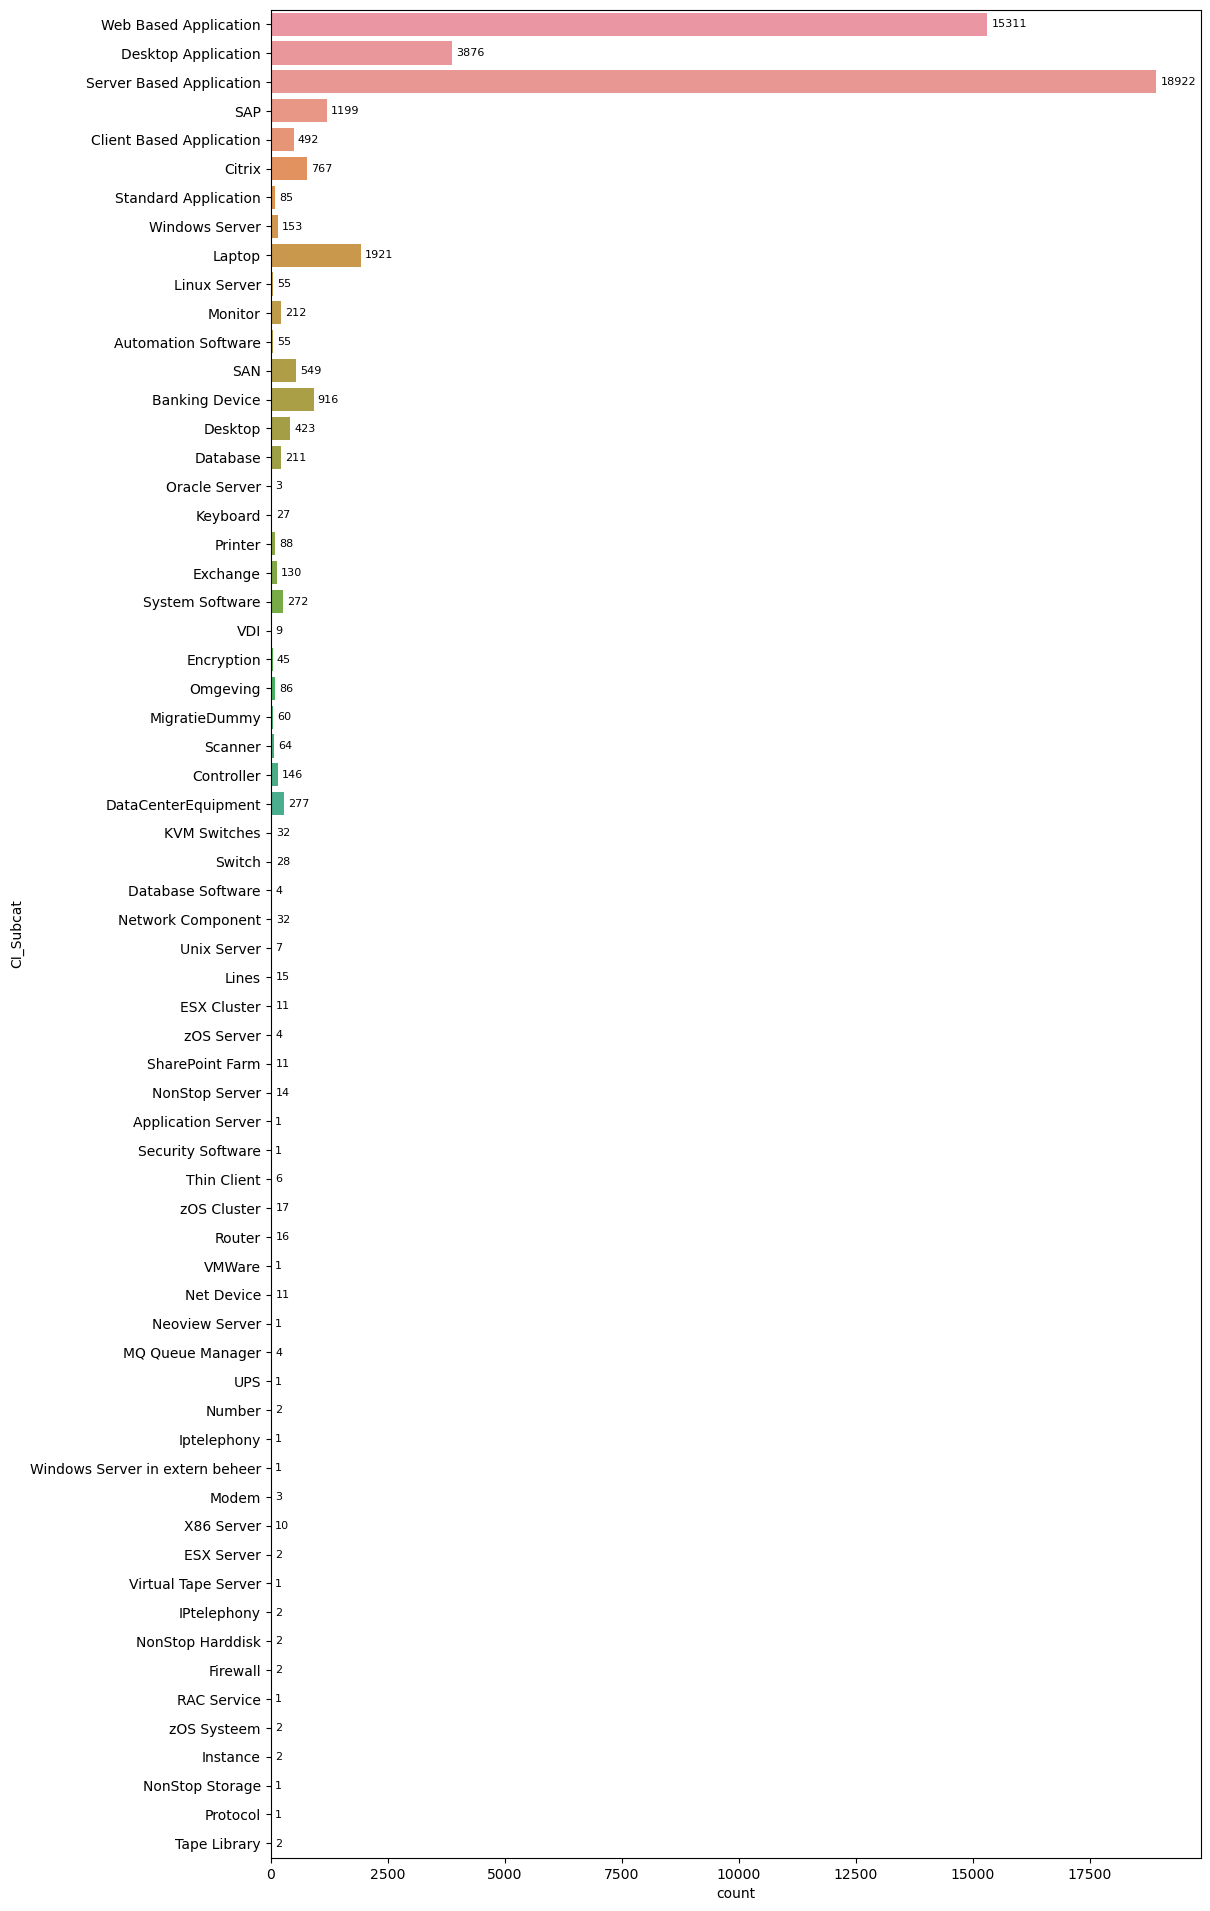

In [26]:
plt.figure(figsize=(12,24))
ax= sns.countplot(y='CI_Subcat', data=df)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=8)

In [27]:
print("Contribution of Top 3 CI Subcategories in percentage:",(df['CI_Subcat'].value_counts()[:3]).sum()/len(df)*100)

Contribution of Top 3 CI Subcategories in percentage: 81.76844183152384


**OBSERVATION:**

Most of the tickets are related  to `Server based Application`(18811), `Web based Application`(15311), and `Desktop Applications`(3876) and these 3 categories contribute to more than 80% tickets.

### 2. Analyising the Status of Tickets

In [28]:
df.Status.unique()

array(['Closed', 'Work in progress'], dtype=object)

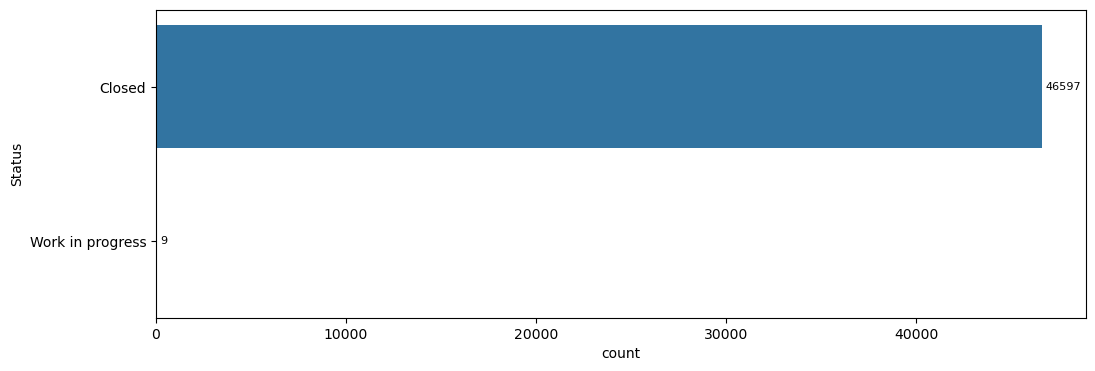

In [29]:
plt.figure(figsize=(12,4))
ax= sns.countplot(y='Status', data=df)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=8)

**OBSERVATION:**

Most of the tickets are closed. Only 9 tickets have 'Work in Progress' Status

### 3. Analyising the Category of Tickets

In [30]:
df.Category.unique()

array(['incident', 'request for information', 'complaint',
       'request for change'], dtype=object)

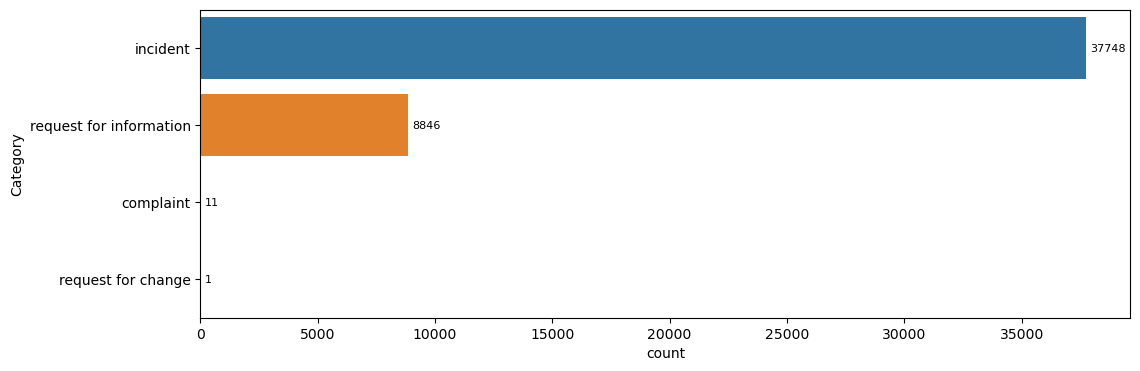

In [31]:
plt.figure(figsize=(12,4))
ax= sns.countplot(y='Category', data=df)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=8)

In [32]:
df['Category'].value_counts()[:1]

incident    37748
Name: Category, dtype: int64

In [33]:
df['Category'].value_counts()[1:2]

request for information    8846
Name: Category, dtype: int64

In [34]:
print("% of Unforeseen Incidents:",(df['Category'].value_counts()[:1]).sum()/len(df)*100)
print("% of Request for Information:",(df['Category'].value_counts()[1:2]).sum()/len(df)*100)

% of Unforeseen Incidents: 80.9938634510578
% of Request for Information: 18.980388791142772


**OBSERVATION:**
- Most of the instances are unforeseen incidents contributing around 81% of the instances.
- Around 18% of the tickets are requests for information.
- There are only 11 complaints and 1 request for change.

### 4. Analyising the Distribution of Handle Time in Hours

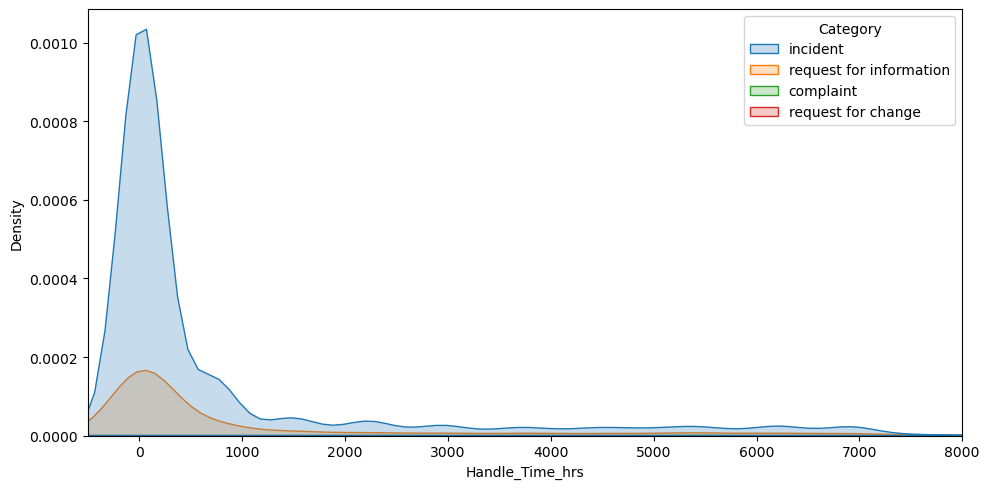

In [35]:
plt.figure(figsize=(10,5))
sns.kdeplot(df, x="Handle_Time_hrs", hue='Category', shade=True)
plt.xlim(-500, 8000)
plt.tight_layout()
plt.show()

**OBSERVATION:**
It is evident from the histplot that most of the tickets are handled in less than 200 hours. 

### 5. Analysing Closure_Code Type

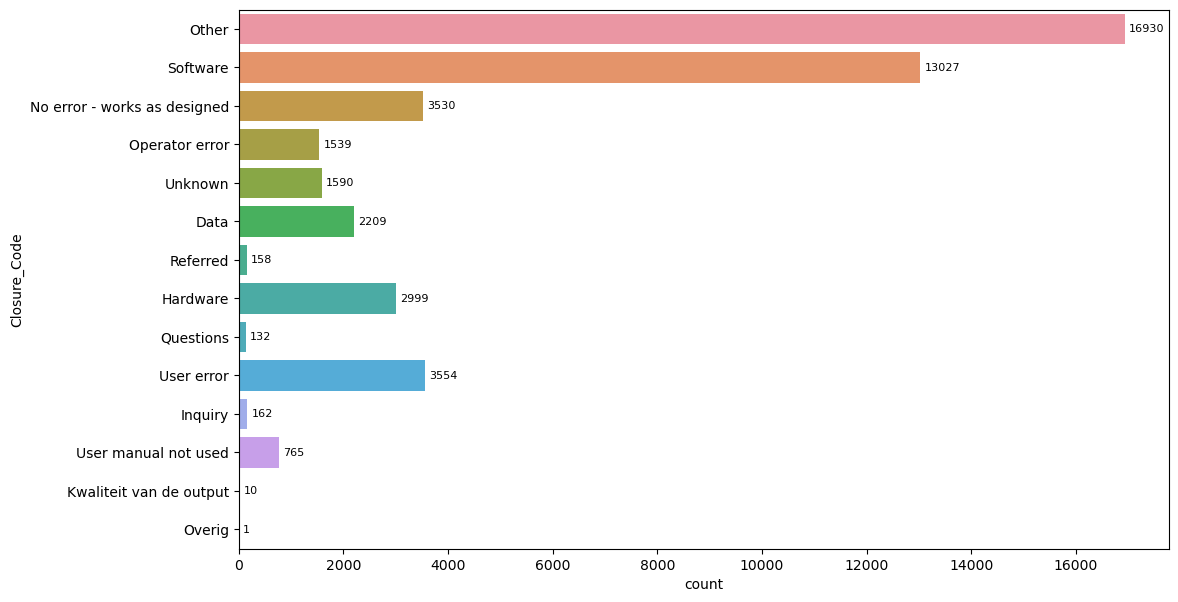

In [36]:
plt.figure(figsize=(12,7))
ax= sns.countplot(y='Closure_Code', data=df)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=8)

## Data Preprocessing

### 1.Dropping Unique and Redundent Columns

In [37]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4,4.0,0.601292,incident,KM0000553,closed,26.0,2012-05-02 13:32:00,2013-04-11 13:51:00,8256.316667,Other,1.0,SD0000007
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3,3.0,0.415050,incident,KM0000611,closed,33.0,2012-12-03 15:44:00,2013-02-12 12:36:00,1700.866667,Software,1.0,SD0000011
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,4.0,3,4.0,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,15722.616667,No error - works as designed,1.0,SD0000017
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4,4.0,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,11637.700000,Operator error,1.0,SD0000025
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4,4.0,0.345258,incident,KM0000611,closed,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,7370.900000,Other,1.0,SD0000029


In [38]:
redundant_columns = ['CI_Name', 'WBS', 'Status', 'Alert_Status',
                     'Incident_ID', 'number_cnt', 'KB_number', 'Handle_Time_hrs', 'Related_Interaction']

In [39]:
df_model = df.drop(redundant_columns, axis = 1)

In [40]:
df_model.head()

,CI_Cat,CI_Subcat,Impact,Urgency,Priority,Category,No_of_Reassignments,Open_Time,Close_Time,Closure_Code,No_of_Related_Interactions
0,subapplication,Web Based Application,4.0,4,4.0,incident,26.0,2012-05-02 13:32:00,2013-04-11 13:51:00,Other,1.0
1,application,Web Based Application,3.0,3,3.0,incident,33.0,2012-12-03 15:44:00,2013-02-12 12:36:00,Software,1.0
2,application,Desktop Application,4.0,3,4.0,request for information,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,No error - works as designed,1.0
3,application,Web Based Application,4.0,4,4.0,incident,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,Operator error,1.0
4,application,Web Based Application,4.0,4,4.0,incident,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,Other,1.0


In [41]:
df_model.shape

(46606, 11)

### 2. Checking the Correlation Between the Features.

In [42]:
df_model.columns

Index(['CI_Cat', 'CI_Subcat', 'Impact', 'Urgency', 'Priority', 'Category',
       'No_of_Reassignments', 'Open_Time', 'Close_Time', 'Closure_Code',
       'No_of_Related_Interactions'],
      dtype='object')

<Axes: >

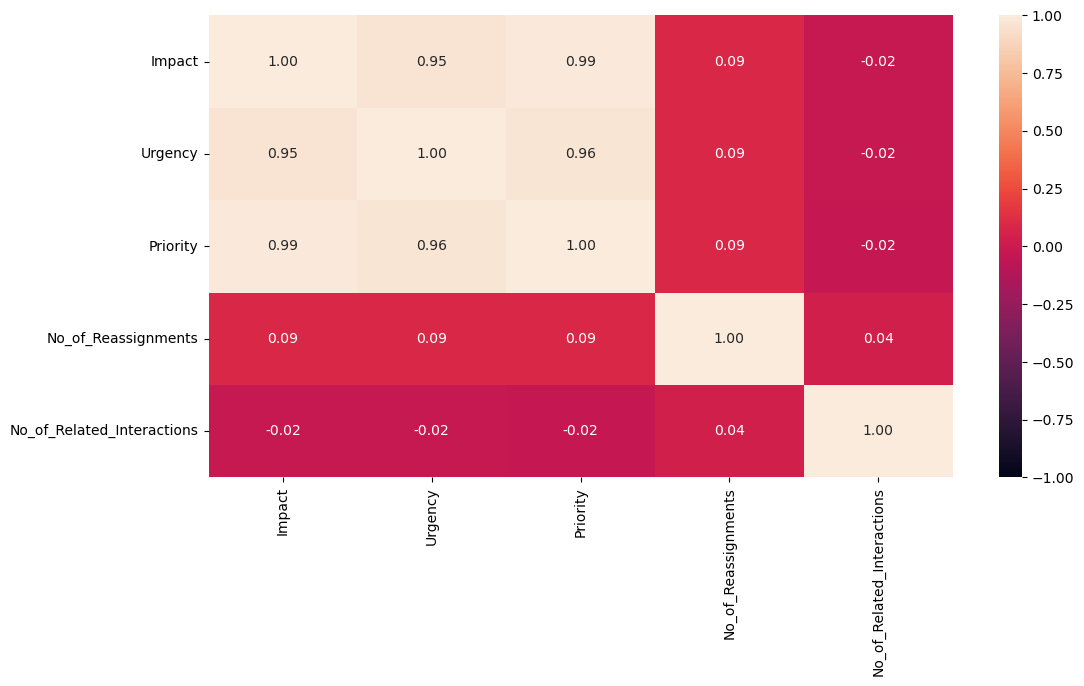

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df_model.corr(), vmin=-1, vmax=1, fmt='.2f', annot=True )

In [44]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46606 non-null  object        
 1   CI_Subcat                   46606 non-null  object        
 2   Impact                      46606 non-null  float64       
 3   Urgency                     46606 non-null  int64         
 4   Priority                    46606 non-null  float64       
 5   Category                    46606 non-null  object        
 6   No_of_Reassignments         46606 non-null  float64       
 7   Open_Time                   46606 non-null  datetime64[ns]
 8   Close_Time                  46606 non-null  datetime64[ns]
 9   Closure_Code                46606 non-null  object        
 10  No_of_Related_Interactions  46606 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)


# Task 1
**Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.**

In [45]:
df_model['Priority'].value_counts()

4.0    24097
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: Priority, dtype: int64

In [46]:
# Replacing the high priority ticket 1 and 2 as 1 and remaining tickets as 0.

df_model['Priority'] = df_model['Priority'].replace((1,2,3,4,5),(1,1,0,0,0))

In [47]:
df_model['Priority'].value_counts()

0.0    45906
1.0      700
Name: Priority, dtype: int64

**One-Hot Encoding Categorical Features**

In [48]:
df_model = pd.get_dummies(df_model,columns = ['CI_Cat','CI_Subcat','Category','Closure_Code'], drop_first=False)
df_model.head()

,Impact,Urgency,Priority,No_of_Reassignments,Open_Time,Close_Time,No_of_Related_Interactions,CI_Cat_Phone,CI_Cat_application,CI_Cat_applicationcomponent,CI_Cat_computer,CI_Cat_database,CI_Cat_displaydevice,CI_Cat_hardware,CI_Cat_networkcomponents,CI_Cat_officeelectronics,CI_Cat_software,CI_Cat_storage,CI_Cat_subapplication,CI_Subcat_Application Server,CI_Subcat_Automation Software,CI_Subcat_Banking Device,CI_Subcat_Citrix,CI_Subcat_Client Based Application,CI_Subcat_Controller,CI_Subcat_DataCenterEquipment,CI_Subcat_Database,CI_Subcat_Database Software,CI_Subcat_Desktop,CI_Subcat_Desktop Application,CI_Subcat_ESX Cluster,CI_Subcat_ESX Server,CI_Subcat_Encryption,CI_Subcat_Exchange,CI_Subcat_Firewall,CI_Subcat_IPtelephony,CI_Subcat_Instance,CI_Subcat_Iptelephony,CI_Subcat_KVM Switches,CI_Subcat_Keyboard,CI_Subcat_Laptop,CI_Subcat_Lines,CI_Subcat_Linux Server,CI_Subcat_MQ Queue Manager,CI_Subcat_MigratieDummy,CI_Subcat_Modem,CI_Subcat_Monitor,CI_Subcat_Neoview Server,CI_Subcat_Net Device,CI_Subcat_Network Component,CI_Subcat_NonStop Harddisk,CI_Subcat_NonStop Server,CI_Subcat_NonStop Storage,CI_Subcat_Number,CI_Subcat_Omgeving,CI_Subcat_Oracle Server,CI_Subcat_Printer,CI_Subcat_Protocol,CI_Subcat_RAC Service,CI_Subcat_Router,CI_Subcat_SAN,CI_Subcat_SAP,CI_Subcat_Scanner,CI_Subcat_Security Software,CI_Subcat_Server Based Application,CI_Subcat_SharePoint Farm,CI_Subcat_Standard Application,CI_Subcat_Switch,CI_Subcat_System Software,CI_Subcat_Tape Library,CI_Subcat_Thin Client,CI_Subcat_UPS,CI_Subcat_Unix Server,CI_Subcat_VDI,CI_Subcat_VMWare,CI_Subcat_Virtual Tape Server,CI_Subcat_Web Based Application,CI_Subcat_Windows Server,CI_Subcat_Windows Server in extern beheer,CI_Subcat_X86 Server,CI_Subcat_zOS Cluster,CI_Subcat_zOS Server,CI_Subcat_zOS Systeem,Category_complaint,Category_incident,Category_request for change,Category_request for information,Closure_Code_Data,Closure_Code_Hardware,Closure_Code_Inquiry,Closure_Code_Kwaliteit van de output,Closure_Code_No error - works as designed,Closure_Code_Operator error,Closure_Code_Other,Closure_Code_Overig,Closure_Code_Questions,Closure_Code_Referred,Closure_Code_Software,Closure_Code_Unknown,Closure_Code_User error,Closure_Code_User manual not used
0,4.0,4,0.0,26.0,2012-05-02 13:32:00,2013-04-11 13:51:00,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3.0,3,0.0,33.0,2012-12-03 15:44:00,2013-02-12 12:36:00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4.0,3,0.0,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4.0,4,0.0,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4.0,4,0.0,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Feature Scaling
Using Robust Scaler

In [49]:
from sklearn.preprocessing import RobustScaler
rsc=RobustScaler()
df_model[['Impact','Urgency','No_of_Reassignments','No_of_Related_Interactions']] = rsc.fit_transform(df_model[['Impact','Urgency','No_of_Reassignments','No_of_Related_Interactions']])

In [50]:
df_model.drop(['Close_Time', 'Open_Time'], axis=1, inplace=True)

In [51]:
df_model

,Impact,Urgency,Priority,No_of_Reassignments,No_of_Related_Interactions,CI_Cat_Phone,CI_Cat_application,CI_Cat_applicationcomponent,CI_Cat_computer,CI_Cat_database,CI_Cat_displaydevice,CI_Cat_hardware,CI_Cat_networkcomponents,CI_Cat_officeelectronics,CI_Cat_software,CI_Cat_storage,CI_Cat_subapplication,CI_Subcat_Application Server,CI_Subcat_Automation Software,CI_Subcat_Banking Device,CI_Subcat_Citrix,CI_Subcat_Client Based Application,CI_Subcat_Controller,CI_Subcat_DataCenterEquipment,CI_Subcat_Database,CI_Subcat_Database Software,CI_Subcat_Desktop,CI_Subcat_Desktop Application,CI_Subcat_ESX Cluster,CI_Subcat_ESX Server,CI_Subcat_Encryption,CI_Subcat_Exchange,CI_Subcat_Firewall,CI_Subcat_IPtelephony,CI_Subcat_Instance,CI_Subcat_Iptelephony,CI_Subcat_KVM Switches,CI_Subcat_Keyboard,CI_Subcat_Laptop,CI_Subcat_Lines,CI_Subcat_Linux Server,CI_Subcat_MQ Queue Manager,CI_Subcat_MigratieDummy,CI_Subcat_Modem,CI_Subcat_Monitor,CI_Subcat_Neoview Server,CI_Subcat_Net Device,CI_Subcat_Network Component,CI_Subcat_NonStop Harddisk,CI_Subcat_NonStop Server,CI_Subcat_NonStop Storage,CI_Subcat_Number,CI_Subcat_Omgeving,CI_Subcat_Oracle Server,CI_Subcat_Printer,CI_Subcat_Protocol,CI_Subcat_RAC Service,CI_Subcat_Router,CI_Subcat_SAN,CI_Subcat_SAP,CI_Subcat_Scanner,CI_Subcat_Security Software,CI_Subcat_Server Based Application,CI_Subcat_SharePoint Farm,CI_Subcat_Standard Application,CI_Subcat_Switch,CI_Subcat_System Software,CI_Subcat_Tape Library,CI_Subcat_Thin Client,CI_Subcat_UPS,CI_Subcat_Unix Server,CI_Subcat_VDI,CI_Subcat_VMWare,CI_Subcat_Virtual Tape Server,CI_Subcat_Web Based Application,CI_Subcat_Windows Server,CI_Subcat_Windows Server in extern beheer,CI_Subcat_X86 Server,CI_Subcat_zOS Cluster,CI_Subcat_zOS Server,CI_Subcat_zOS Systeem,Category_complaint,Category_incident,Category_request for change,Category_request for information,Closure_Code_Data,Closure_Code_Hardware,Closure_Code_Inquiry,Closure_Code_Kwaliteit van de output,Closure_Code_No error - works as designed,Closure_Code_Operator error,Closure_Code_Other,Closure_Code_Overig,Closure_Code_Questions,Closure_Code_Referred,Closure_Code_Software,Closure_Code_Unknown,Closure_Code_User error,Closure_Code_User manual not used
0,0.0,0.0,0.0,13.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-1.0,-1.0,0.0,16.5,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.0,-1.0,0.0,1.5,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,6.5,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
46602,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Train Test Split

In [52]:
X, y = df_model.drop("Priority", axis=1), df_model['Priority']

In [53]:
print(X.shape)
print(y.shape)

(46606, 98)
(46606,)


### Balancing the Classes of Target Variables

In [54]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample = SMOTE().fit_resample(X,y)

In [55]:
# Create train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state=42, test_size=0.3)

## MODEL BUILDING

In [56]:
# MODELS

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [57]:
# MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 1. LOGISTIC REGRESSION MODEL

In [58]:
logisticregression = LogisticRegression(C=1, multi_class='ovr',max_iter=100).fit(X_train, y_train)

In [59]:
print("Logistic Regression coefficients shape: ", logisticregression.coef_.shape)
print("Logistic Regression intercept shape: ", logisticregression.intercept_.shape)

Logistic Regression coefficients shape:  (1, 98)
Logistic Regression intercept shape:  (1,)


In [60]:
y_train_pred_logR = logisticregression.predict(X_train) # training model 
y_test_pred_logR = logisticregression.predict(X_test) # testing model 

In [61]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score: %f" % accuracy_score(y_train, y_train_pred_logR))
print("Logistic Regression test set score: %f" % accuracy_score(y_test, y_test_pred_logR))

Logistic Regression training set score: 1.000000
Logistic Regression test set score: 1.000000


In [62]:
# Classification Report
print(classification_report(y_test, y_test_pred_logR, target_names=['Priority', 'Not_Priority']))

              precision    recall  f1-score   support

    Priority       1.00      1.00      1.00     13761
Not_Priority       1.00      1.00      1.00     13783

    accuracy                           1.00     27544
   macro avg       1.00      1.00      1.00     27544
weighted avg       1.00      1.00      1.00     27544



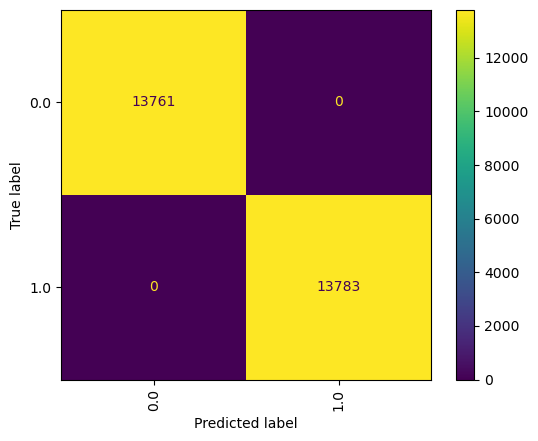

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_logR, xticks_rotation='vertical')

### 2. KNN MODEL

In [64]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
y_train_pred_knn=knn_clf.predict(X_train)
y_test_pred_knn=knn_clf.predict(X_test)

In [66]:
#Evaluate KNN model:

print("KNN training set score: %f" % accuracy_score(y_train, y_train_pred_knn))
print("KNN test set score: %f" % accuracy_score(y_test, y_test_pred_knn))

KNN training set score: 0.999782
KNN test set score: 0.999746


In [67]:
# Classification Report
print(classification_report(y_test, y_test_pred_knn, target_names=['Priority', 'Not_Priority']))

              precision    recall  f1-score   support

    Priority       1.00      1.00      1.00     13761
Not_Priority       1.00      1.00      1.00     13783

    accuracy                           1.00     27544
   macro avg       1.00      1.00      1.00     27544
weighted avg       1.00      1.00      1.00     27544



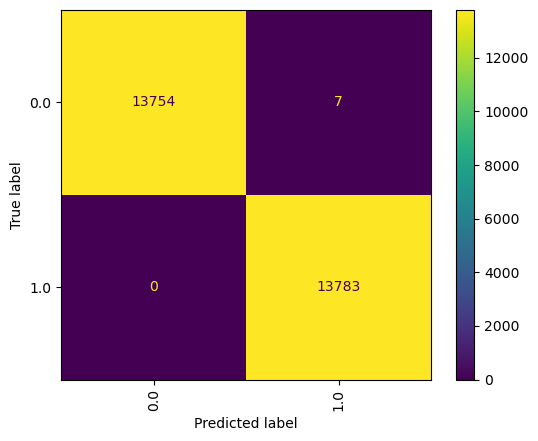

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_knn, xticks_rotation='vertical')

### SVC MODEL

In [69]:
svc_clf = SVC(kernel='linear', gamma=1, C=1, decision_function_shape='ovr')
svc_clf.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [70]:
y_train_pred_svc=svc_clf.predict(X_train)
y_test_pred_svc=svc_clf.predict(X_test)

In [71]:
#Evaluate SVC model:

print("SVC training set score: %f" % accuracy_score(y_train, y_train_pred_svc))
print("SVC test set score: %f" % accuracy_score(y_test, y_test_pred_svc))

SVC training set score: 1.000000
SVC test set score: 1.000000


In [72]:
# Classification Report
print(classification_report(y_test, y_test_pred_svc, target_names=['Priority', 'Not_Priority']))

              precision    recall  f1-score   support

    Priority       1.00      1.00      1.00     13761
Not_Priority       1.00      1.00      1.00     13783

    accuracy                           1.00     27544
   macro avg       1.00      1.00      1.00     27544
weighted avg       1.00      1.00      1.00     27544



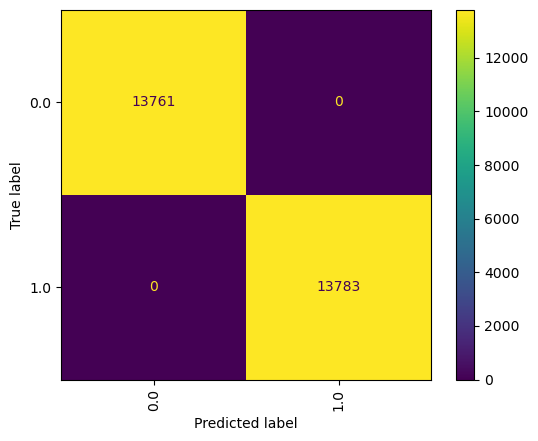

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svc, xticks_rotation='vertical')

## Task 2: 
**Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.**


In [74]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4,4.0,0.601292,incident,KM0000553,closed,26.0,2012-05-02 13:32:00,2013-04-11 13:51:00,8256.316667,Other,1.0,SD0000007
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3,3.0,0.415050,incident,KM0000611,closed,33.0,2012-12-03 15:44:00,2013-02-12 12:36:00,1700.866667,Software,1.0,SD0000011
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,4.0,3,4.0,0.517551,request for information,KM0000339,closed,3.0,2012-03-29 12:36:00,2014-01-13 15:13:00,15722.616667,No error - works as designed,1.0,SD0000017
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4,4.0,0.642927,incident,KM0000611,closed,13.0,2012-07-17 11:49:00,2013-11-14 09:31:00,11637.700000,Operator error,1.0,SD0000025
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4,4.0,0.345258,incident,KM0000611,closed,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,7370.900000,Other,1.0,SD0000029


In [75]:
print(df.shape)

(46606, 20)


In [76]:
import datetime as dt

In [77]:
df_task2 = df[['Close_Time', 'CI_Cat']]

In [78]:
df_task2['CI_Cat'].value_counts()

application             33011
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [79]:
df_task2 = df_task2.pivot_table( index= 'Close_Time', columns='CI_Cat', aggfunc='size', dropna=False, fill_value=0)

In [80]:
df_task2 = df_task2[['application','subapplication','computer']]

In [81]:
df_task2.head(5)

CI_Cat,application,subapplication,computer
Close_Time,,,
2013-01-10 06:45:00,1,0,0
2013-01-10 07:27:00,1,0,0
2013-01-10 07:29:00,0,1,0
2013-01-10 07:46:00,1,0,0
2013-01-10 07:47:00,0,1,0


In [82]:
df_task2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34528 entries, 2013-01-10 06:45:00 to 2014-12-03 17:56:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   application     34528 non-null  int64
 1   subapplication  34528 non-null  int64
 2   computer        34528 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [83]:
df_task2 = df_task2.resample('M').sum()

In [84]:
df_task2.sum().sort_values()

CI_Cat
computer           3643
subapplication     7782
application       33011
dtype: int64

In [85]:
df_task2

CI_Cat,application,subapplication,computer
Close_Time,,,
2013-01-31,484,110,71
2013-02-28,540,137,67
2013-03-31,664,153,49
2013-04-30,781,189,88
2013-05-31,587,124,68
2013-06-30,560,110,63
2013-07-31,564,93,63
2013-08-31,570,110,57
2013-09-30,575,107,56


In [86]:
df_task2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2013-01-31 to 2014-12-31
Freq: M
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   application     24 non-null     int64
 1   subapplication  24 non-null     int64
 2   computer        24 non-null     int64
dtypes: int64(3)
memory usage: 768.0 bytes


###  Plotting the Time Series

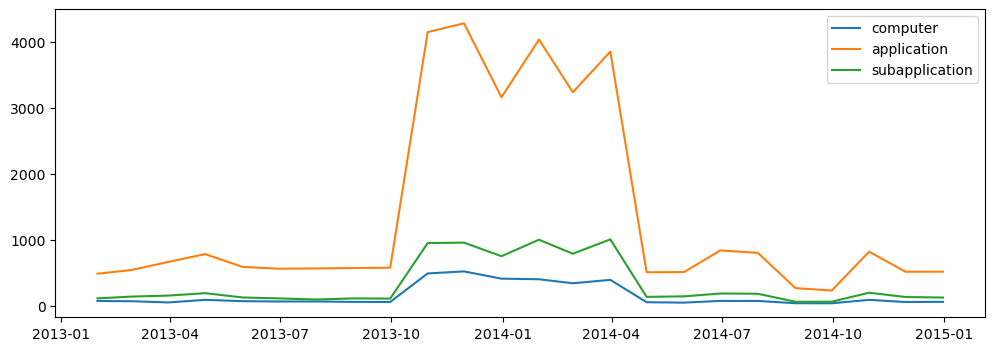

In [87]:
plt.subplots(figsize=(12,4))
plt.plot(df_task2['computer'], label='computer')
plt.plot(df_task2['application'], label='application')
plt.plot(df_task2['subapplication'], label='subapplication')
plt.legend();

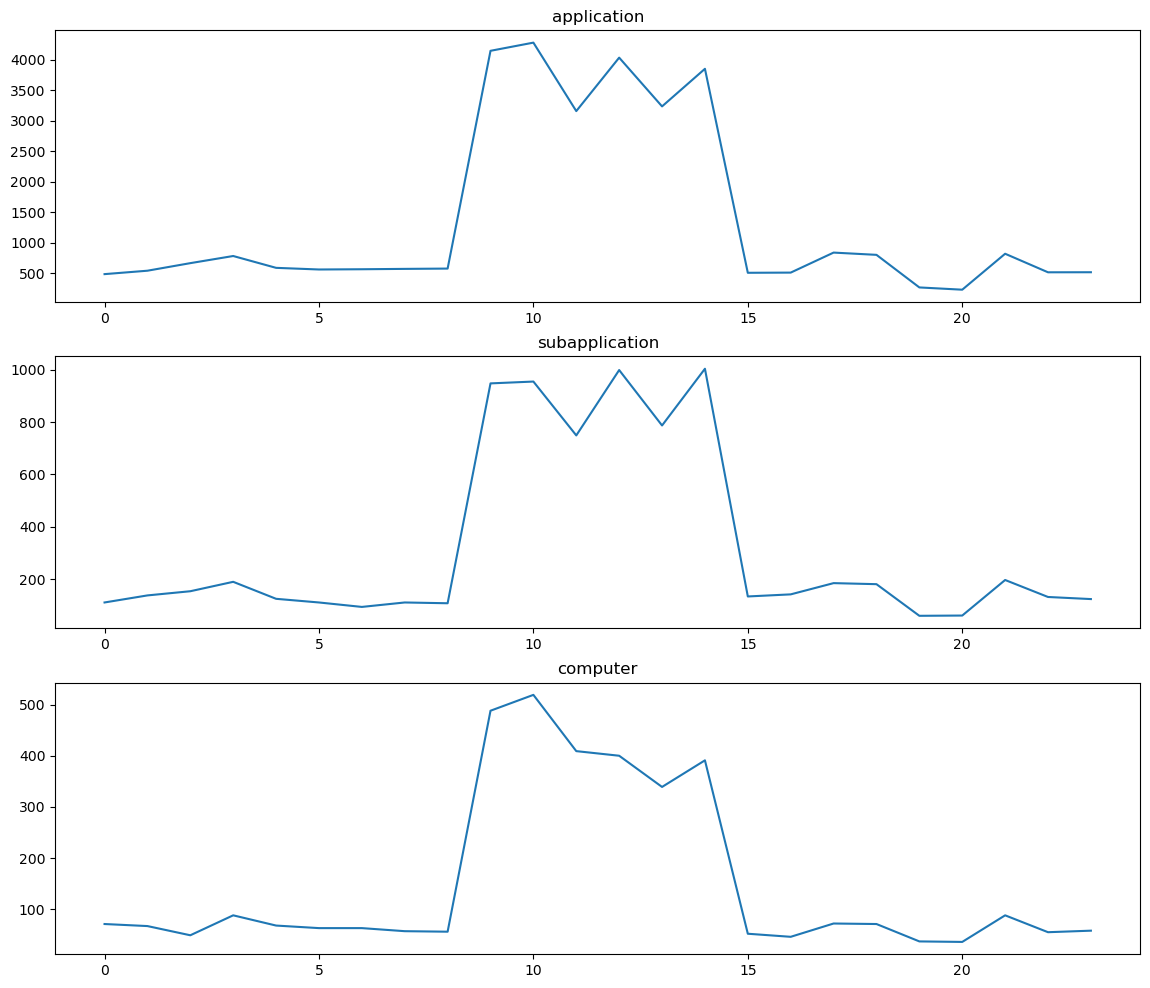

In [88]:
# load dataset
values = df_task2.values
# specify columns to plot
groups = [0, 1, 2]
i = 1
# plot each column
plt.figure(figsize=(14,12))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df_task2.columns[group], y=1.0, loc='center')
    i += 1
plt.show()

In [89]:
df_task2.shape

(24, 3)

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

**Checking the Stationarity with diffencing at different orders**

In [91]:
ad_fuller_result_1 = adfuller(df_task2['application'].diff()[4:])

print('application')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_task2['subapplication'].diff()[4:])

print('subapplication')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(df_task2['computer'].diff()[2:])

print('computer')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

application
ADF Statistic: -4.602583213498598
p-value: 0.0001277608994779956

---------------------

subapplication
ADF Statistic: -3.831065787152153
p-value: 0.0026049934159481573

---------------------

computer
ADF Statistic: -2.933599724637374
p-value: 0.041578003176881755


Application and Subapplication are stationary after fourth order differcing, but the computer is stationary after second order differencing.

In [92]:
train_df=df_task2[:-4]
test_df=df_task2[-4:]

In [93]:
test_df.shape

(4, 3)

In [94]:
train_df = train_df.astype('float32')

Stationarity can be enforced with `enforce_stationarity= True`

In [95]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                         Statespace Model Results                                        
Dep. Variable:     ['application', 'subapplication', 'computer']   No. Observations:                   20
Model:                                                    VAR(4)   Log Likelihood                -307.099
                                                     + intercept   AIC                            704.199
Date:                                           Mon, 17 Apr 2023   BIC                            749.007
Time:                                                   11:31:37   HQIC                           712.946
Sample:                                               01-31-2013                                         
                                                    - 08-31-2014                                         
Covariance Type:                                             opg                                         
Ljung-Box (L1) (Q):       0.20, 0.62, 0.00   J

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
train_df

CI_Cat,application,subapplication,computer
Close_Time,,,
2013-01-31,484.0,110.0,71.0
2013-02-28,540.0,137.0,67.0
2013-03-31,664.0,153.0,49.0
2013-04-30,781.0,189.0,88.0
2013-05-31,587.0,124.0,68.0
2013-06-30,560.0,110.0,63.0
2013-07-31,564.0,93.0,63.0
2013-08-31,570.0,110.0,57.0
2013-09-30,575.0,107.0,56.0


In [97]:
n_forecast = 24
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean.astype('int64')

In [98]:
predictions.columns=['application_predicted','subapplication_predicted', 'computer_predicted']
predictions

,application_predicted,subapplication_predicted,computer_predicted
2014-09-30,1114,232,121
2014-10-31,1640,335,210
2014-11-30,2310,526,268
2014-12-31,2087,477,236
2015-01-31,2941,695,323
2015-02-28,3085,728,344
2015-03-31,2946,707,333
2015-04-30,2800,675,309
2015-05-31,2731,661,295
2015-06-30,2476,608,265


In [99]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<Axes: >

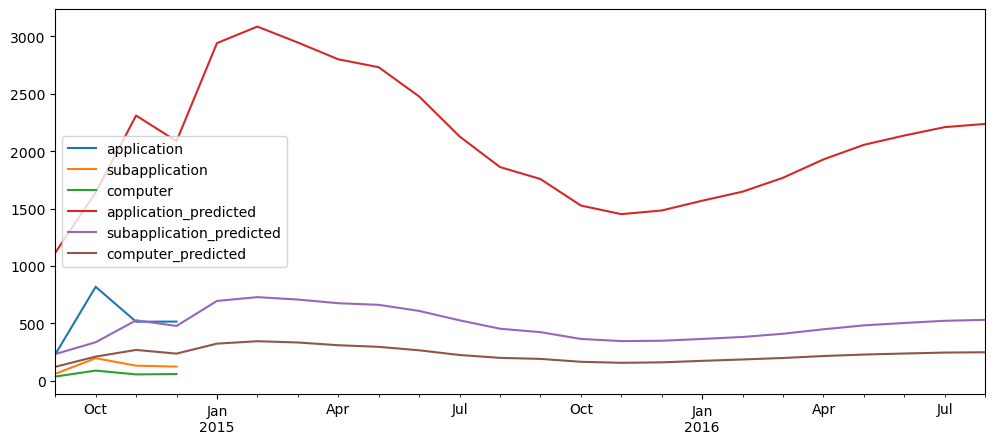

In [100]:
test_vs_pred.plot(figsize=(12,5))

In [101]:
predictions.columns

Index(['application_predicted', 'subapplication_predicted',
       'computer_predicted'],
      dtype='object')

In [102]:
predictions['application_predicted'][:6]

2014-09-30    1114
2014-10-31    1640
2014-11-30    2310
2014-12-31    2087
2015-01-31    2941
2015-02-28    3085
Freq: M, Name: application_predicted, dtype: int64

In [103]:
from sklearn.metrics import mean_squared_error, accuracy_score
import math 
from statistics import mean

rmse_application=math.sqrt(mean_squared_error(predictions['application_predicted'][:4],test_df['application']))
print('Mean value of number of application related tickets is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['application']),rmse_application))
""
rmse_subapplication=math.sqrt(mean_squared_error(predictions['subapplication_predicted'][:4],test_df['subapplication']))
print('Mean value of number of subapplication related tickets is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['subapplication']),rmse_subapplication))

rmse_computer=math.sqrt(mean_squared_error(predictions['computer_predicted'][:4],test_df['computer']))
print('Mean value of number of computer related tickets is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['computer']),rmse_computer))

Mean value of number of application related tickets is : 519. Root Mean Squared Error is :1337.5078504442506
Mean value of number of subapplication related tickets is : 127.5. Root Mean Squared Error is :287.3351701410741
Mean value of number of computer related tickets is : 59.25. Root Mean Squared Error is :157.44999206097154


In [104]:
predictions_quarterly = predictions.resample('Q').sum()

In [105]:
predictions_quarterly

,application_predicted,subapplication_predicted,computer_predicted
2014-09-30,1114,232,121
2014-12-31,6037,1338,714
2015-03-31,8972,2130,1000
2015-06-30,8007,1944,869
2015-09-30,5746,1402,613
2015-12-31,4460,1057,481
2016-03-31,4983,1154,556
2016-06-30,6119,1433,680
2016-09-30,4446,1052,493


In [106]:
predictions_annualy = predictions.resample('Y').sum()

In [107]:
predictions_annualy

,application_predicted,subapplication_predicted,computer_predicted
2014-12-31,7151,1570,835
2015-12-31,27185,6533,2963
2016-12-31,15548,3639,1729


### TASK-3

In [108]:
df_model.columns

Index(['Impact', 'Urgency', 'Priority', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'CI_Cat_Phone', 'CI_Cat_application',
       'CI_Cat_applicationcomponent', 'CI_Cat_computer', 'CI_Cat_database',
       'CI_Cat_displaydevice', 'CI_Cat_hardware', 'CI_Cat_networkcomponents',
       'CI_Cat_officeelectronics', 'CI_Cat_software', 'CI_Cat_storage',
       'CI_Cat_subapplication', 'CI_Subcat_Application Server',
       'CI_Subcat_Automation Software', 'CI_Subcat_Banking Device',
       'CI_Subcat_Citrix', 'CI_Subcat_Client Based Application',
       'CI_Subcat_Controller', 'CI_Subcat_DataCenterEquipment',
       'CI_Subcat_Database', 'CI_Subcat_Database Software',
       'CI_Subcat_Desktop', 'CI_Subcat_Desktop Application',
       'CI_Subcat_ESX Cluster', 'CI_Subcat_ESX Server', 'CI_Subcat_Encryption',
       'CI_Subcat_Exchange', 'CI_Subcat_Firewall', 'CI_Subcat_IPtelephony',
       'CI_Subcat_Instance', 'CI_Subcat_Iptelephony', 'CI_Subcat_KVM Switches',
       'CI_Subcat_

In [109]:
df_task3 = df[['CI_Cat', 'CI_Subcat', 'Priority', 'Category']]

In [110]:
df_task3 = pd.get_dummies(df_task3, columns = ['CI_Cat','CI_Subcat'], drop_first=True)
df_task3

,Priority,Category,CI_Cat_application,CI_Cat_applicationcomponent,CI_Cat_computer,CI_Cat_database,CI_Cat_displaydevice,CI_Cat_hardware,CI_Cat_networkcomponents,CI_Cat_officeelectronics,CI_Cat_software,CI_Cat_storage,CI_Cat_subapplication,CI_Subcat_Automation Software,CI_Subcat_Banking Device,CI_Subcat_Citrix,CI_Subcat_Client Based Application,CI_Subcat_Controller,CI_Subcat_DataCenterEquipment,CI_Subcat_Database,CI_Subcat_Database Software,CI_Subcat_Desktop,CI_Subcat_Desktop Application,CI_Subcat_ESX Cluster,CI_Subcat_ESX Server,CI_Subcat_Encryption,CI_Subcat_Exchange,CI_Subcat_Firewall,CI_Subcat_IPtelephony,CI_Subcat_Instance,CI_Subcat_Iptelephony,CI_Subcat_KVM Switches,CI_Subcat_Keyboard,CI_Subcat_Laptop,CI_Subcat_Lines,CI_Subcat_Linux Server,CI_Subcat_MQ Queue Manager,CI_Subcat_MigratieDummy,CI_Subcat_Modem,CI_Subcat_Monitor,CI_Subcat_Neoview Server,CI_Subcat_Net Device,CI_Subcat_Network Component,CI_Subcat_NonStop Harddisk,CI_Subcat_NonStop Server,CI_Subcat_NonStop Storage,CI_Subcat_Number,CI_Subcat_Omgeving,CI_Subcat_Oracle Server,CI_Subcat_Printer,CI_Subcat_Protocol,CI_Subcat_RAC Service,CI_Subcat_Router,CI_Subcat_SAN,CI_Subcat_SAP,CI_Subcat_Scanner,CI_Subcat_Security Software,CI_Subcat_Server Based Application,CI_Subcat_SharePoint Farm,CI_Subcat_Standard Application,CI_Subcat_Switch,CI_Subcat_System Software,CI_Subcat_Tape Library,CI_Subcat_Thin Client,CI_Subcat_UPS,CI_Subcat_Unix Server,CI_Subcat_VDI,CI_Subcat_VMWare,CI_Subcat_Virtual Tape Server,CI_Subcat_Web Based Application,CI_Subcat_Windows Server,CI_Subcat_Windows Server in extern beheer,CI_Subcat_X86 Server,CI_Subcat_zOS Cluster,CI_Subcat_zOS Server,CI_Subcat_zOS Systeem
0,4.0,incident,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3.0,incident,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4.0,request for information,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,incident,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.0,incident,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,4.0,incident,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46602,4.0,incident,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46603,5.0,incident,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46604,4.0,incident,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [111]:
df_task3['Category'].unique()

array(['incident', 'request for information', 'complaint',
       'request for change'], dtype=object)

In [112]:
df_task3['Category'] = df_task3['Category'].replace(('incident','request for information','complaint','request for change'),(0,1,2,1))

In [113]:
df_task3['Category'].value_counts()

0    37748
1     8847
2       11
Name: Category, dtype: int64

In [114]:
df_task3

,Priority,Category,CI_Cat_application,CI_Cat_applicationcomponent,CI_Cat_computer,CI_Cat_database,CI_Cat_displaydevice,CI_Cat_hardware,CI_Cat_networkcomponents,CI_Cat_officeelectronics,CI_Cat_software,CI_Cat_storage,CI_Cat_subapplication,CI_Subcat_Automation Software,CI_Subcat_Banking Device,CI_Subcat_Citrix,CI_Subcat_Client Based Application,CI_Subcat_Controller,CI_Subcat_DataCenterEquipment,CI_Subcat_Database,CI_Subcat_Database Software,CI_Subcat_Desktop,CI_Subcat_Desktop Application,CI_Subcat_ESX Cluster,CI_Subcat_ESX Server,CI_Subcat_Encryption,CI_Subcat_Exchange,CI_Subcat_Firewall,CI_Subcat_IPtelephony,CI_Subcat_Instance,CI_Subcat_Iptelephony,CI_Subcat_KVM Switches,CI_Subcat_Keyboard,CI_Subcat_Laptop,CI_Subcat_Lines,CI_Subcat_Linux Server,CI_Subcat_MQ Queue Manager,CI_Subcat_MigratieDummy,CI_Subcat_Modem,CI_Subcat_Monitor,CI_Subcat_Neoview Server,CI_Subcat_Net Device,CI_Subcat_Network Component,CI_Subcat_NonStop Harddisk,CI_Subcat_NonStop Server,CI_Subcat_NonStop Storage,CI_Subcat_Number,CI_Subcat_Omgeving,CI_Subcat_Oracle Server,CI_Subcat_Printer,CI_Subcat_Protocol,CI_Subcat_RAC Service,CI_Subcat_Router,CI_Subcat_SAN,CI_Subcat_SAP,CI_Subcat_Scanner,CI_Subcat_Security Software,CI_Subcat_Server Based Application,CI_Subcat_SharePoint Farm,CI_Subcat_Standard Application,CI_Subcat_Switch,CI_Subcat_System Software,CI_Subcat_Tape Library,CI_Subcat_Thin Client,CI_Subcat_UPS,CI_Subcat_Unix Server,CI_Subcat_VDI,CI_Subcat_VMWare,CI_Subcat_Virtual Tape Server,CI_Subcat_Web Based Application,CI_Subcat_Windows Server,CI_Subcat_Windows Server in extern beheer,CI_Subcat_X86 Server,CI_Subcat_zOS Cluster,CI_Subcat_zOS Server,CI_Subcat_zOS Systeem
0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46602,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46603,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46604,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [115]:
X= df_task3.drop(['Category'],axis=1)
y= df_task3.Category

In [116]:
df_task3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Priority                                   46606 non-null  float64
 1   Category                                   46606 non-null  int64  
 2   CI_Cat_application                         46606 non-null  uint8  
 3   CI_Cat_applicationcomponent                46606 non-null  uint8  
 4   CI_Cat_computer                            46606 non-null  uint8  
 5   CI_Cat_database                            46606 non-null  uint8  
 6   CI_Cat_displaydevice                       46606 non-null  uint8  
 7   CI_Cat_hardware                            46606 non-null  uint8  
 8   CI_Cat_networkcomponents                   46606 non-null  uint8  
 9   CI_Cat_officeelectronics                   46606 non-null  uint8  
 10  CI_Cat_software       

In [117]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample = SMOTE().fit_resample(X,y)

In [118]:
print(X.shape)
print(y.shape)

(46606, 75)
(46606,)


In [119]:
print(X_resample.shape)
print(y_resample.shape)

(113244, 75)
(113244,)


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size=0.3, random_state=42)

## MODEL BUILDING

In [121]:
# MODELS

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [122]:
# MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### LOGISTIC REGRESSION MODEL

In [123]:
logisticregression = LogisticRegression(C=1, multi_class='ovr',max_iter=100).fit(X_train, y_train)

In [124]:
print("Logistic Regression coefficients shape: ", logisticregression.coef_.shape)
print("Logistic Regression intercept shape: ", logisticregression.intercept_.shape)

Logistic Regression coefficients shape:  (3, 75)
Logistic Regression intercept shape:  (3,)


In [125]:
y_train_pred_logR = logisticregression.predict(X_train) # training model 
y_test_pred_logR = logisticregression.predict(X_test) # testing model 

In [126]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score: %f" % accuracy_score(y_train, y_train_pred_logR))
print("Logistic Regression test set score: %f" % accuracy_score(y_test, y_test_pred_logR))

Logistic Regression training set score: 0.919932
Logistic Regression test set score: 0.919026


In [127]:
# Classification Report
print(classification_report(y_test, y_test_pred_logR, target_names=['incident','request for information/request for change','complaint']))

                                            precision    recall  f1-score   support

                                  incident       0.86      0.91      0.89     11354
request for information/request for change       0.91      0.85      0.88     11486
                                 complaint       0.99      1.00      0.99     11134

                                  accuracy                           0.92     33974
                                 macro avg       0.92      0.92      0.92     33974
                              weighted avg       0.92      0.92      0.92     33974



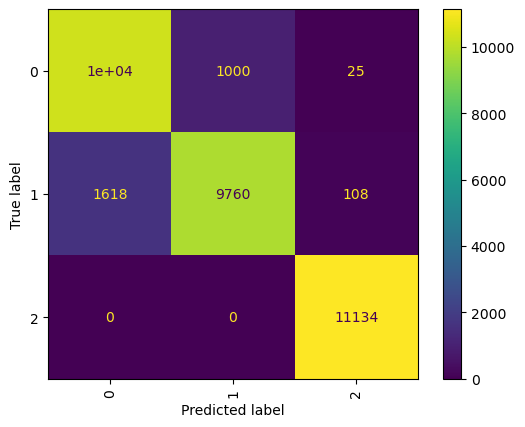

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_logR, xticks_rotation='vertical')

### KNN MODEL

In [129]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [130]:
y_train_pred_knn=knn_clf.predict(X_train)
y_test_pred_knn=knn_clf.predict(X_test)

In [131]:
#Evaluate KNN model:

print("KNN training set score: %f" % accuracy_score(y_train, y_train_pred_knn))
print("KNN test set score: %f" % accuracy_score(y_test, y_test_pred_knn))

KNN training set score: 0.921938
KNN test set score: 0.921263


Text(0, 0.5, 'Testing Accuracy')

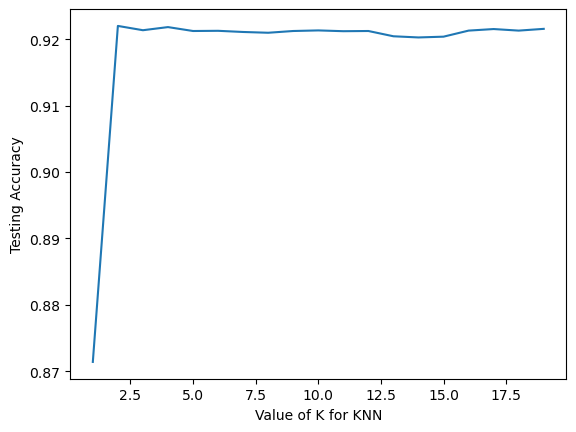

In [132]:
k_range = list(range(1, 20))
scores = []
for k in k_range:
    knn_1 = KNeighborsClassifier(n_neighbors=k)
    knn_1.fit(X_train, y_train)
    y_pred_knn = knn_1.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_knn))
    
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [133]:
# instantiate the model with the best known parameters
knn_clf_1 = KNeighborsClassifier(n_neighbors=16)

knn_clf_1.fit(X_train,y_train)

y_train_pred_knn_1=knn_clf_1.predict(X_train)
y_test_pred_knn_1=knn_clf_1.predict(X_test)

In [134]:
#Evaluate KNN model:

print("KNN training set score: %f" % accuracy_score(y_train, y_train_pred_knn_1))
print("KNN test set score: %f" % accuracy_score(y_test, y_test_pred_knn_1))

KNN training set score: 0.921849
KNN test set score: 0.921322


In [135]:
# Classification Report
print(classification_report(y_test, y_test_pred_knn_1, target_names=['incident','request for information/request for change','complaint']))

                                            precision    recall  f1-score   support

                                  incident       0.86      0.92      0.89     11354
request for information/request for change       0.91      0.85      0.88     11486
                                 complaint       0.99      1.00      0.99     11134

                                  accuracy                           0.92     33974
                                 macro avg       0.92      0.92      0.92     33974
                              weighted avg       0.92      0.92      0.92     33974



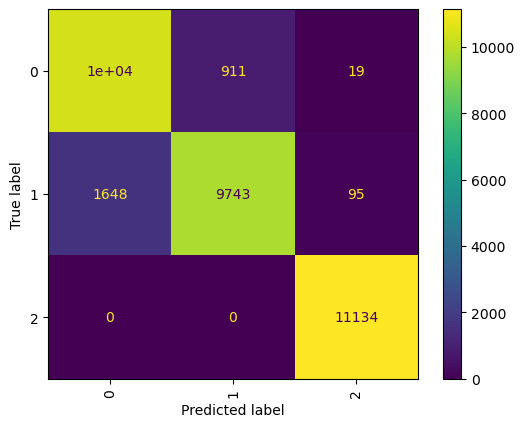

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_knn_1, xticks_rotation='vertical')

## SVC MODEL

In [137]:
svc_clf = SVC(kernel='linear', gamma=1, C=1, decision_function_shape='ovr')
svc_clf.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [138]:
y_train_pred_svc=svc_clf.predict(X_train)
y_test_pred_svc=svc_clf.predict(X_test)

In [139]:
#Evaluate SVC model:

print("SVC training set score: %f" % accuracy_score(y_train, y_train_pred_svc))
print("SVC test set score: %f" % accuracy_score(y_test, y_test_pred_svc))

SVC training set score: 0.920449
SVC test set score: 0.919586


In [140]:
# Classification Report
print(classification_report(y_test, y_test_pred_svc, target_names=['incident','request for information/request for change','complaint']))

                                            precision    recall  f1-score   support

                                  incident       0.86      0.91      0.89     11354
request for information/request for change       0.91      0.85      0.88     11486
                                 complaint       0.99      1.00      1.00     11134

                                  accuracy                           0.92     33974
                                 macro avg       0.92      0.92      0.92     33974
                              weighted avg       0.92      0.92      0.92     33974



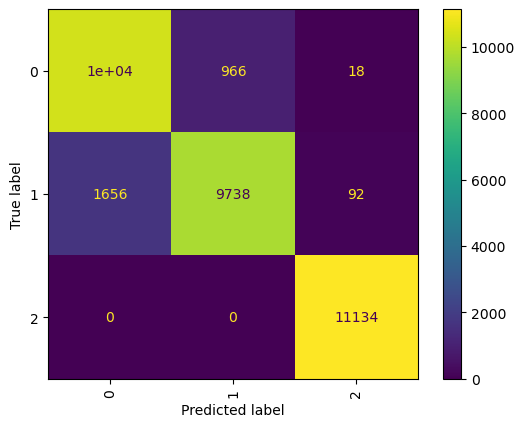

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svc, xticks_rotation='vertical')

### DECISION TREE MODEL

In [142]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [143]:
# Predicting the model
y_train_pred_dtree = dtree_model.predict(X_train)
y_test_pred_dtree = dtree_model.predict(X_test)

In [144]:
#Evaluate Decision Tree model:

print("Decision Tree training set score: %f" % accuracy_score(y_train, y_train_pred_dtree))
print("Decision Tree test set score: %f" % accuracy_score(y_test, y_test_pred_dtree))

Decision Tree training set score: 0.923792
Decision Tree test set score: 0.921646


In [145]:
# Classification Report
print(classification_report(y_test, y_test_pred_dtree, target_names=['incident','request for information/request for change','complaint']))

                                            precision    recall  f1-score   support

                                  incident       0.92      0.85      0.88     11354
request for information/request for change       0.86      0.92      0.89     11486
                                 complaint       0.99      1.00      1.00     11134

                                  accuracy                           0.92     33974
                                 macro avg       0.92      0.92      0.92     33974
                              weighted avg       0.92      0.92      0.92     33974



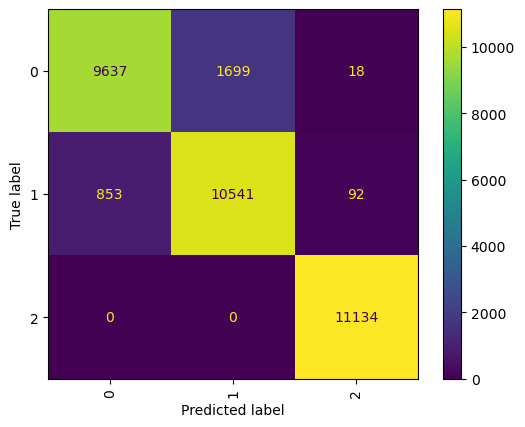

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_dtree, xticks_rotation='vertical')

### RANDOM FOREST MODEL

In [147]:
rf_model = RandomForestClassifier(max_depth = 27)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=27)

In [148]:
# Predicting the model
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [149]:
#Evaluate Random Forest model:

print("Random Forest training set score: %f" % accuracy_score(y_train, y_train_pred_rf))
print("Random Forest test set score: %f" % accuracy_score(y_test, y_test_pred_rf))

Random Forest training set score: 0.923792
Random Forest test set score: 0.921558


In [150]:
# Classification Report
print(classification_report(y_test, y_test_pred_rf, target_names=['incident','request for information/request for change','complaint']))

                                            precision    recall  f1-score   support

                                  incident       0.92      0.85      0.88     11354
request for information/request for change       0.86      0.92      0.89     11486
                                 complaint       0.99      1.00      1.00     11134

                                  accuracy                           0.92     33974
                                 macro avg       0.92      0.92      0.92     33974
                              weighted avg       0.92      0.92      0.92     33974



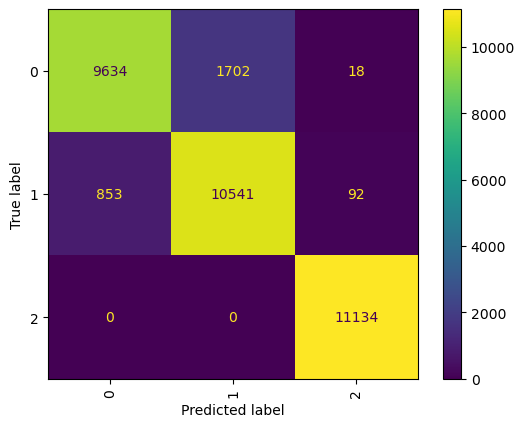

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf, xticks_rotation='vertical')

### XGBOOST MODEL

In [152]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [153]:
# Predicting the model
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [154]:
#Evaluate XGBoost model:

print("XGB training set score: %f" % accuracy_score(y_train, y_train_pred_xgb))
print("XGB test set score: %f" % accuracy_score(y_test, y_test_pred_xgb))

XGB training set score: 0.923477
XGB test set score: 0.921528


In [155]:
# Classification Report
print(classification_report(y_test, y_test_pred_xgb, target_names=['incident','request for information/request for change','complaint']))

                                            precision    recall  f1-score   support

                                  incident       0.92      0.85      0.88     11354
request for information/request for change       0.86      0.92      0.89     11486
                                 complaint       0.99      1.00      1.00     11134

                                  accuracy                           0.92     33974
                                 macro avg       0.92      0.92      0.92     33974
                              weighted avg       0.92      0.92      0.92     33974



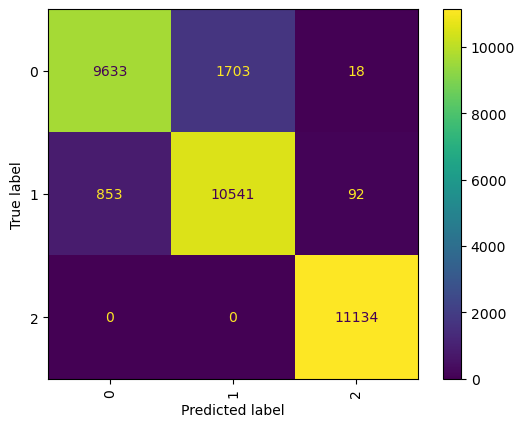

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_xgb, xticks_rotation='vertical')

## SUMMARY

ABC Tech on an average receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management, problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.
ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

In order to improve the ABC Tech management incident management process has approached to utilise the power of Machine Learning and the prospective to improve ITSM processes through prediction and automation. 

The four key areas, where ML was able to ABC Tech to help in their ITSM processes are:

- 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
- 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
- 3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
- 4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

**METHODOLOGY FOLLOWED**


> The dataset contains incident/tickets raised by the clients of ABC Tech on different priority levels and with different impacts on their service and infrastructure. The dataset has around 46606 entries with 26 features for two years from 2012 to 2014.

> The dataset was fetched from the MYSQL database and queried for the data from the dataset. 

> Exploratory data analysis has been carried out in order to get the insights from different variables.

> The dataset did contained many missing values on some features which was handled using statistical methods and some of the features were dropped as the missing values was 90% of the available data.

> In order to solve every tasks, specific dataframe with relavent features were created for model building and evaluation studies.  

> Various classification models has been studied and evaluated with confusion metrices and classification reports.


**INSIGHTS FROM CLASSIFICATION MODELS:**

**TASK-1:** 
   **Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.**

- In order to predict the priority ticket 1 & 2, the priority feature was encoded as 1 for priority ticket 1 & 2 and the remaining tickets as 0.

- Categorical features like 'CI_Cat','CI_Subcat','Category' and 'Closure_Code' was encoded using one hot encoder.

- Numerical features like 'Impact','Urgency','No_of_Reassignments' and 'No_of_Related_Interactions' was standardised using robust scaler.

- Task-1 was solved using ML classification model. The various ML models which was used and evaluated for their performace are listed below. 

***Model-1: Logestic Regression***
> The logestic regression model performed well and gave accuracy score for test and train data were 1 and 1. Also, the classification report and confusion metrices has been plotted for model evaluation.

***Model-2: KNN Classifier***
> The KNN classifier model also performed well and gave the same accuracy score for test and train data were 1 and 1. Also, the classification report and confusion metrices has been plotted for model evaluation.

***Model-3: Support Vector Classifier***
> The SV classifier model also performed well and gave the same accuracy score for test and train data were 1 and 1. Also, the classification report and confusion metrices has been plotted for model evaluation.

-The above 3 classification models gave highest and almost the same results in train and test dataset. Hence we can select any one of from the three models for tags the tickets.

**TASK-2:** 
   **Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.**

- In order to forecast the incident volume in different fields, the close time and CI category column has been used for the time series modelling and forecast.

- For Task-2, Vector Auto-Regression (VAR) model was used. VAR model is suitable for related parallel multivariate time series forecasting.

**TASK-3:** 
   **Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.**

- In order to tag the tickets with right priorities and right department, category column was used as the target variable and encoded as 0,1,2 representing whether the tickets are Incident, Complaints or request for information/change.

- Categorical features like 'CI_Cat','CI_Subcat','Category' and 'Closure_Code' was encoded using one hot encoder.


***Model-1: Logestic Regression***
> The logestic regression model performed well and gave accuracy score for test and train data were 0.921 and 0.918. Also, the classification report and confusion metrices has been plotted for model evaluation.

***Model-2: KNN Classifier***
> The KNN classifier model also performed well and gave the same accuracy score for test and train data were 0.923 and 0.920. Also, the classification report and confusion metrices has been plotted for model evaluation.

***Model-3: Support Vector Classifier***
> The SV classifier model also performed well and gave the same accuracy score for test and train data were 0.921 and 0.919. Also, the classification report and confusion metrices has been plotted for model evaluation.

***Model-4: Desicion Tree Classifier***
> The Desicion tree classifier model also performed well and gave the same accuracy score for test and train data were 0.924 and 0.922. Also, the classification report and confusion metrices has been plotted for model evaluation.

***Model-5: Random Forest Classifier***
> The Random Forest classifier model also performed well and gave the same accuracy score for test and train data were 0.924 and 0.922. Also, the classification report and confusion metrices has been plotted for model evaluation.

***Model-6: XGB Classifier***
> The XGB classifier model also performed well and gave the same accuracy score for test and train data were 0.924 and 0.922. Also, the classification report and confusion metrices has been plotted for model evaluation.

- Decision Tree, Random Forest and XGB classifier models gave highest and almost the same results in train and test dataset. Hence we can select any one of from the three models for tags the tickets.

**TASK-4:** 
   **Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.**

- Due to lack of details/information from the client, the prediction for RFC (Request for change) and possible failure / misconfiguration of ITSM assets could not been carried out as the dataset was not sufficient.

- Hence the Task-4 could not be carried out.


**CONCLUSION:**

The dataset was fetched and queried from MYSQL database. The dataset contains incident/tickets raised by the clients of ABC Tech on different priority levels and with different impacts on their service and infrastructure. The dataset has around 46606 entries with 26 features for two years from 2012 to 2014. 

ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

In order to improve the ABC Tech management incident management process has approached to utilise the power of Machine Learning and the prospective to improve ITSM processes through prediction and automation. 

The four key areas, where ML was able to ABC Tech to help in their ITSM processes are:

- 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
- 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
- 3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
- 4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.



* **TASK-1:** Various Machine learning classification models to classify and predict the high priority tickets (ie., 1 & 2 tickets) has been modelled and evaluated for their performance. 

* **TASK-2:** To Forecast the incident volume in different fields, encoder decoder LSTM model has been implemented and evaluated for the performace using MSE metric.

* **TASK-3:** Various Machine learning tag the tickets with right priorities and right departments has been modelled and evaluated for their performance. 

* **TASK-4:** Due to lack of details/information from the client, the prediction for RFC (Request for change) and possible failure / misconfiguration of ITSM assets could not been carried out as the dataset was not sufficient. 

### CHALLENGES FACED:

The dataset was fetched and queried from MYSQL database using the host credentials.

 The dataset did contained many missing values on some features which was handled using statistical methods and some of the features were dropped as the missing values was 90% of the available data.

For Task 2, the timestamps were inconsistent. Because of random time stamps, the series had to be resampled into the monthly data. The dataset was too small to get good scores and predictions giving us a very limited choice to select models.

Due to lack of details/information from the client, the prediction for RFC (Request for change) and possible failure / misconfiguration of ITSM assets could not been carried out as the dataset was not sufficient.